In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("timeseries.xlsx")
df = df.set_index("GEO (Labels)")
df.shape # 37x12 = 444 --> N
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GEO (Labels),,,,,,,,,,,,
Belgium,290.50,292.07,292.48,291.34,291.55,293.36,295.71,297.55,301.75,307.41,308.29,312.96
Bulgaria,369.53,366.42,375.47,378.10,386.26,391.45,397.67,398.69,404.54,413.76,424.49,421.71
Czechia,357.47,355.54,357.63,359.55,363.67,367.47,368.79,NaN,NaN,NaN,NaN,403.76
Denmark,345.81,357.94,365.12,372.59,378.92,383.76,384.94,387.74,392.93,399.82,410.89,419.44
Germany (until 1990 former territory of the FRG),348.63,354.06,361.89,374.81,387.70,394.64,403.50,410.82,413.93,418.65,424.88,431.09


In [4]:
df.isnull().sum().sum() # 99 nan varsa N = 444-99 = 345
pop = 345

In [5]:
a = df.describe()
a

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,28.000000,27.000000,29.000000,29.000000,30.000000,30.000000,30.000000,29.000000,28.000000,29.000000,29.000000,27.000000
mean,305.800714,317.599259,312.637931,317.460690,320.879667,326.057667,331.740667,344.245172,349.477143,354.922759,362.216552,373.644444
std,73.838985,64.662468,72.651263,73.511294,74.711789,74.981785,76.058535,65.554110,65.984802,65.486793,66.693354,62.701895
min,122.090000,209.780000,124.880000,124.960000,123.160000,127.430000,128.110000,217.110000,232.810000,241.580000,237.750000,276.410000
25%,263.297500,271.805000,270.400000,286.380000,281.245000,283.812500,286.215000,301.200000,307.727500,307.410000,310.110000,322.875000
50%,310.860000,323.330000,304.740000,308.560000,310.205000,315.425000,322.690000,335.880000,345.315000,345.650000,360.330000,366.960000
75%,361.705000,365.305000,365.120000,375.790000,383.460000,386.445000,388.742500,388.040000,395.832500,399.820000,410.890000,413.380000
max,453.780000,460.410000,468.910000,479.530000,484.220000,489.540000,498.850000,504.610000,509.120000,512.960000,518.280000,524.140000


In [6]:
pop_list = a.iloc[1]
pop_mean_value = pop_list.mean()
pop_mean_value

334.7235553579031

In [7]:
pop_mean = pd.DataFrame(pop_list)
pop_mean

,mean
2007,305.800714
2008,317.599259
2009,312.637931
2010,317.460690
2011,320.879667
2012,326.057667
2013,331.740667
2014,344.245172
2015,349.477143
2016,354.922759


In [8]:
ts = pop_mean["mean"]
ts

2007    305.800714
2008    317.599259
2009    312.637931
2010    317.460690
2011    320.879667
2012    326.057667
2013    331.740667
2014    344.245172
2015    349.477143
2016    354.922759
2017    362.216552
2018    373.644444
Name: mean, dtype: float64

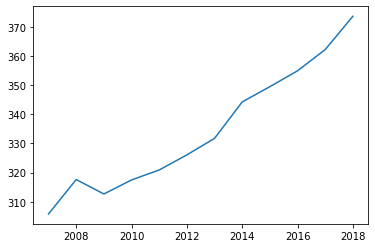

In [9]:
plt.plot(ts)

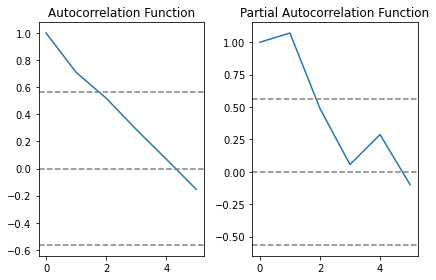

In [11]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=5)
lag_pacf = pacf(ts, nlags=5, method='ols')

#lag sayısı örneklem sayısısının yarısından daha az olmalı. bu sebeple nlags < 6 seçilmelidir.

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [12]:
from statsmodels.tsa.stattools import adfuller
ts_result = adfuller(ts)
ts_result

(0.8598822759360281,
 0.9925437965367077,
 0,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 38.135832408150705)

In [13]:
ts_diff = ts.diff().dropna()
ts_diff

2008    11.798545
2009    -4.961328
2010     4.822759
2011     3.418977
2012     5.178000
2013     5.683000
2014    12.504506
2015     5.231970
2016     5.445616
2017     7.293793
2018    11.427893
Name: mean, dtype: float64

In [14]:
ts_diff_result = adfuller(ts_diff)
ts_diff_result

(-3.607875796029404,
 0.005612232283576957,
 0,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 38.723435626163464)

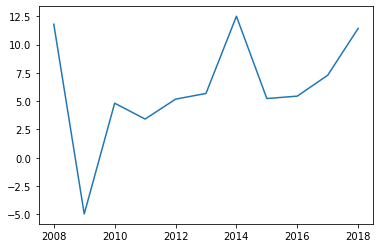

In [15]:
plt.plot(ts_diff)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   10
Model:                     ARMA(0, 4)   Log Likelihood                 -27.442
Method:                       css-mle   S.D. of innovations              2.872
Date:                Sat, 29 May 2021   AIC                             66.885
Time:                        22:19:54   BIC                             68.700
Sample:                             0   HQIC                            64.893
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8800      3.257      1.499      0.134      -1.503      11.263
ma.L1.y        0.6815      0.504      1.351      0.177      -0.307       1.670
ma.L2.y        0.7549      0.462      1.633      0.1

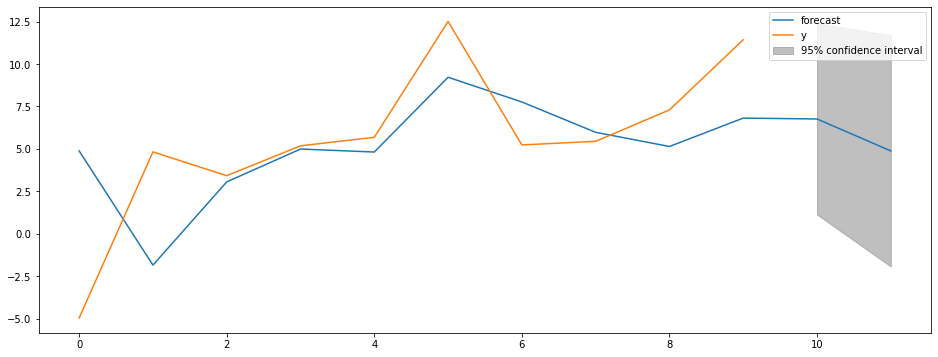

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
model = ARIMA(ts_diff.iloc[1:].values, order=(0,0,4))
result = model.fit()
print(result.summary())
result.plot_predict(start=0, end=11)
plt.show()

In [18]:
pd1 = pd.DataFrame({"yıl":[2007, 2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                     "ortalama":[305.800714, 317.599259, 312.637931, 317.460690, 320.879667, 326.057667, 331.740667, 344.245172, 349.477143,354.922759, 362.216552, 373.644444]})
pd1 = pd1.set_index("yıl")
pd1

,ortalama
yıl,
2007,305.800714
2008,317.599259
2009,312.637931
2010,317.460690
2011,320.879667
2012,326.057667
2013,331.740667
2014,344.245172
2015,349.477143


In [19]:
pd2 = pd.DataFrame({"yıl":[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
                     "ortalama":[305.800714, 317.599259, 312.637931, 317.460690, 320.879667, 326.057667, 331.740667, 344.245172, 349.477143,354.922759, 362.216552, 373.644444, 379.894444]})
pd2 = pd2.set_index("yıl")
pd2

,ortalama
yıl,
2007,305.800714
2008,317.599259
2009,312.637931
2010,317.460690
2011,320.879667
2012,326.057667
2013,331.740667
2014,344.245172
2015,349.477143


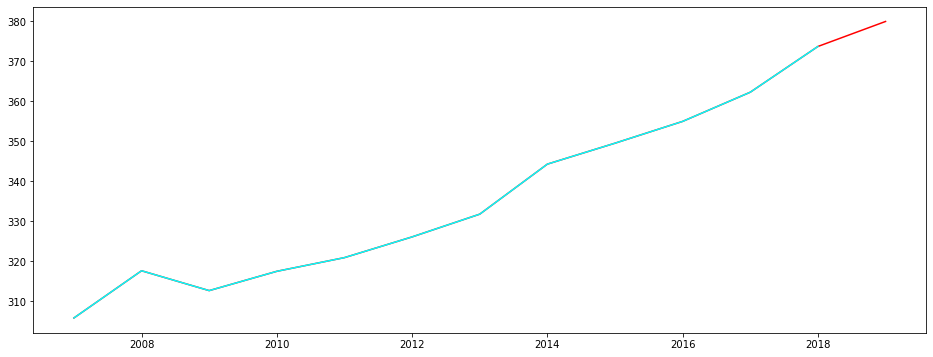

In [24]:
plt.plot(pd2, color="red")
plt.plot(pd1, color = "cyan")